# Week 5: Contingency Tables

## **Notebook Overview**

This notebook is available on github
[here](https://github.com/Yushi-Y/AAS-ongoing-tutorials). If you find errors or would like to suggest an improvement then let me know.

This week is about using contingency tables and a $\chi^{2}$-test to make claims. You will need to use the usual libraries as well as scipy and statsmodels.

The next notebook will be looking at logistic regression. I would also recommend spending a little bit of time on logistic regression as it is a much bigger topic and harder to understand!

### **Additional Resources**

1. **YouTube Videos**
* [**Contingency Tables:**](https://www.youtube.com/watch?v=W95BgQCp_rQ) Runs through a similar (maybe the same...) example from class but at a slower pace and going into more detail. Okay resource.
* [**Hypothesis Testing Example: [Best Resource]**](https://www.youtube.com/watch?v=hpWdDmgsIRE) A good Kahn Academy video walking through a hypothesis test for independence using contingency tables and chi-squared. This is better than the first video. It's at a pace where you can work along with it.
* [**Hypothesis Testing with Two Means:**](https://www.youtube.com/watch?v=UcZwyzwWU7o) Relevant more generally.
* [**Hypothesis Testing for Proportions:**](https://www.youtube.com/watch?v=76VruarGn2Q) Again, relevant more generally.
* [**Ben Lambert on Degrees of Freedom:**](https://www.youtube.com/watch?v=-4aiKmPC994&pp=ygUeYmVuIGxhbWJlcnQgZGVncmVlcyBvZiBmcmVlZG9t) Really useful to understand this but not necessary if you just to want to know how to use the models. Part 2 can be found [here](https://www.youtube.com/watch?v=iA2KZHHZmmg). Would strongly recommend these videos for anyone who has been questioning where we pull the DOF value out from.

2. **Documentation**
* [**SciPy Contingency Tables**:](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) Use SciPy to do a few of the questions in this notebook.

3. **A Level Textbooks**
* Contingency tables are topics taught at A Level so have a look at the textbooks. It will be explained at an introductory level there which might be useful if the other resources are too advanced.

4. **Textbooks**
* It is covered in the Fox textbook (briefly).

As usual we will start by importing some useful libraries.

In [2]:
%config InlineBackend.figure_format = 'svg'
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy as np

Today we will look at a dataset from a double-blind clinical trial of a new
treatment for rheumatoid arthritis. We will test whether treatment is correlated
with a change in symptoms using a $\chi^{2}$-test.

First, we need to load the data which comes bundled with `statsmodels`.

In [3]:
# Access the data
ra = sm.datasets.get_rdataset("Arthritis", "vcd").data

# View it
ra.head()

,ID,Treatment,Sex,Age,Improved
0,57,Treated,Male,27,Some
1,46,Treated,Male,29,None
2,77,Treated,Male,30,None
3,17,Treated,Male,32,Marked
4,36,Treated,Male,46,Marked


### Question 1

Use `pandas` to generate a cross tabulation of the treatment status and
improvement.

[hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)


### Answer

In [4]:
# Pandas crosstab function
outcome_tbl = pd.crosstab(ra.Treatment, ra.Improved)
display(outcome_tbl)

Improved,Marked,None,Some
Treatment,,,
Placebo,7,29,7
Treated,21,13,7


### Question 2

Generate a mosaic plot to display this data.

[hint](https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html)

### Answer

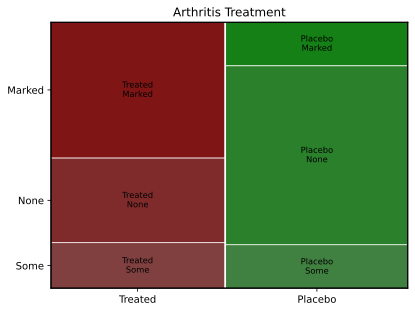

In [5]:
# Use the mosaic function froms statsmodels
mosaic(ra, ['Treatment','Improved'], title = "Arthritis Treatment")
plt.show()

### Question 3

a) What errors does the default plot from `pandas` make?

Hint: these are not numerical errors but things that make it harder to interpret.

b) [EXTENSION] Once you identify the errors then try to write some code to overcome them. Note that depending on which errors you've suggested, this may take you a while so come back to this if you have time.

### Answer


1. It uses red and green as the only colours which can be difficult for people
   with colour blindness.
2. It has not respected the implicit ordering of the response values.

The figure below makes the pattern in the data far clearer (at the expense of a
few extra lines of code).

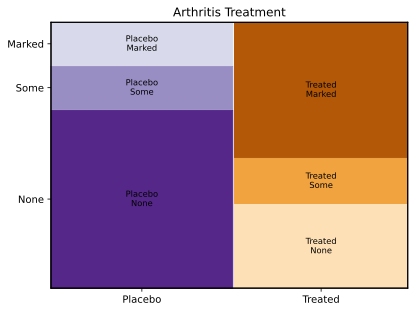

In [6]:
ra['Improved'] = pd.Series(
    pd.Categorical(ra.Improved,
                 categories=['None','Some','Marked'],
                 ordered=True))

props = lambda key: {'color': 'r' if 'a' in key else 'gray'}
props = {}
props[('Treated','Marked')] = {'color': '#b35806'}
props[('Treated','Some')] = {'color': '#f1a340'}
props[('Treated','None')] = {'color': '#fee0b6'}
props[('Placebo','Marked')] = {'color': '#d8daeb'}
props[('Placebo','Some')] = {'color': '#998ec3'}
props[('Placebo','None')] = {'color': '#542788'}

mosaic(ra, ['Treatment','Improved'], title = "Arthritis Treatment", properties=props)
plt.show()

### Question 4

For this trial, what was the null hypothesis?

### Answer


The null hypothesis is that any change in symptoms is independent of whether the patient recieved the treatment or a placebo.

### Question 5

Is it valid to use a $\chi^{2}$-test for this data?

### Answer

We have more than 5 counts in each cell of the table, so we meet the rule of
thumb that says we can use the $\chi^{2}$-test. Be warned, some statisticians
would prefer that you had at least 10 in each cell.

### Question 6

How many degrees of freedom are there in this data?

Hint: Do a bit of research to actually understand degrees of freedom (DOF) more generally. When learning statistics it seems a little bit random where you get the DOF from in each different model but once you realise the theory behind it then it all makes sense. Knowing the theory means that it is much easier to remember the rules for each model as well. I will try to link a good DOF explainer in the resources section.


### Answer

Two, because there are two rows of three columns and $(2 - 1)(3 - 1) = 2$.

See the DOF video in the resources section!

### Question 7

Perform a $\chi^{2}$-test on the contingency table; are treatment and changes in symptoms independent?

Make sure that when you do a hypothesis test you make it nice and formal. Define your hypothesis clearly,...etc











### Answer

The following code carries out the test and suggests we should reject the null
hypothesis.

Null Hypothesis: Treatment and changes are independent

Alternative Hypothesis: Treatment and changes are not independent (looks weird but we say this over 'dependent')

In [7]:
t = outcome_tbl.to_numpy()
col_sums = np.sum(t, axis=0)
row_sums = np.sum(t, axis=1)
total_sum = t.sum()

my_et = np.zeros((2,3))
for ix in range(2):
    for jx in range(3):
        my_et[ix,jx] = col_sums[jx] * row_sums[ix] / total_sum

print("Observed values")
print(t)
print("Expected values under null")
print(my_et)
print("Chi-squared statistic")
my_chi = (np.power(t - my_et, 2) / my_et).sum()
print(my_chi)
print("p-value")
print(1 - scipy.stats.chi2.cdf(my_chi, df=2))

Observed values
[[ 7 29  7]
 [21 13  7]]
Expected values under null
[[14.33333333 21.5         7.16666667]
 [13.66666667 20.5         6.83333333]]
Chi-squared statistic
13.055019852524108
p-value
0.0014626434089526352


In [8]:
chi2, p, dof, expected = scipy.stats.chi2_contingency(outcome_tbl.to_numpy())
print(chi2)
print(p)
print(dof)
print(expected)

13.055019852524108
0.0014626434089526504
2
[[14.33333333 21.5         7.16666667]
 [13.66666667 20.5         6.83333333]]


### Question 8

A) What can we conclude from this hypothesis test?

- We can conclude that treatment and changes in symptoms are not independent.

B) Why did we need to randomise the treatment?

Note that a proper treatment of causality goes well beyond the scope of this course, but recall that randomised controlled trials provide very very high quality evidence.

- Randomisation helps avoid confounding factors which lends more credibility to
  the conclusion that the treatment improves the condition.

### Question 9 [Extension - Do this if time]


Recall from earlier notebooks the function estimate_and_ci which computes the probability of success in repeated Bernoulli trials and the  95%  confidence interval on this estimate.



In [12]:
def estimate_and_ci(num_trials, num_success):
  """ returns a tuple of the probability of success and a confidence interval"""

  # sample probability
  p_hat = num_success / num_trials

  # Define the critical value of standard normal for 2.5% either side
  z = 1.96

  # Calculate +/- part of the CI
  delta = z * np.sqrt(p_hat * (1 - p_hat) / num_trials)

  # Return the CI
  return (p_hat,(p_hat - delta, p_hat + delta))

The functions `rand_small_table` and `rand_big_table` defined below return
random datasets of the same shape as our arthritis dataset under the null
hypothesis, i.e. when the outcome is independent of treatment. The
`rand_small_table` returns data from a smaller cohort and the `rand_big_table`
returns data from a larger cohort.

We're use the Poisson to model each outcome since events are independent and there is no fixed number of trials (i.e. binomial would not be appropriate). We work out the mean of the each outcome using the expected outcomes from the contingency table. We could just scale these expected outcomes up and down but we've added some Poisson randomness to make it more realistic of data you might get.

In [14]:
# Remind ourselves of the outcome table.
outcome_tbl

Improved,Marked,None,Some
Treatment,,,
Placebo,7,29,7
Treated,21,13,7


In [16]:
# Do a chi2 test using scipy. See the documentation for what this returns
_, _, _, expected = scipy.stats.chi2_contingency(outcome_tbl.to_numpy())

def rand_small_table():
    """Return a random dataset with a small cohort. Null hypothesis that events are independent"""
    x = np.array(0)
    while x.min() < 1:
        x = scipy.stats.poisson.rvs(mu = np.array(0.5) * expected) # Scale down with 0.5*expected values.
    return x

def rand_big_table():
  """Return a random dataset with a large cohort. Null hypothesis that events are independent"""
    x = np.array(0)
    while x.min() < 1:
        x = scipy.stats.poisson.rvs(mu = np.array(1.5) * expected) # Scale up with 1.5*expected values.
    return x

Using the functions `estimate_and_ci`, and `rand_small_table` and
`rand_big_table`, demonstrate how the $\chi^{2}$-test will fail if the cell values are too small.

### Answer

The false positive test suggests that the test will not be powerful enough on
smaller tables. Our data is generated using the independence assumption. This is a repeated Bernoulli trial - if all was set up well we would want the false positive rate to be roughly equal to the significance level (10%). If this were not the case then the test would fail.

First consider the test when we use the table with a large number of trials

In [29]:
# Define the number of trials and set up a count for false positives
num_trials = 10000
false_pos_count = 0

# Loop over the trials and count the number of false positives
for _ in range(num_trials):

    # Generate possible data using the big sample function
    x = rand_big_table()

    # Do a test for independence using this data. Extract p_value
    _, p_value, _, _ = scipy.stats.chi2_contingency(x)

    # Add one to the count when the p_value < 10% i.e. false positive
    if p_value < 0.1:
        false_pos_count+=1

# Print the results
print(f"We ran {num_trials} trials and got {false_pos_count} false positives")

# Use our confidence interval function
print(estimate_and_ci(num_trials, false_pos_count))

We ran 10000 trials and got 1049 false positives
(0.1049, (0.09889407929469593, 0.11090592070530406))


We get a sample false positive rate which is very close to our define false positive rate (i.e. the significance level). 10% is within our confidence interval we we've confirmed that the test is working as we would expect it to. Fantastic.

Now consider what happens when we use the small table

In [30]:
# Define the number of trials and set up a count for false positives
num_trials = 10000
false_pos_count = 0

# Loop over the trials and count the number of false positives
for _ in range(num_trials):

    # Generate possible data using the small sample function
    x = rand_small_table()

    # Do a test for independence using this data. Extract p_value
    _, p_value, _, _ = scipy.stats.chi2_contingency(x)

    # Add one to the count when the p_value < 10%
    if p_value < 0.1:
        false_pos_count+=1

# Print the results
print(f"We ran {num_trials} trials and got {false_pos_count} false positives")

# Use our confidence interval function
print(estimate_and_ci(num_trials, false_pos_count))

We ran 10000 trials and got 846 false positives
(0.0846, (0.07914560347844053, 0.09005439652155946))


Ah! The false positive rate is lower than 10% even though we defined it as 10%! Nightmare. In fact, 0.1 doesn't even lie in our confidence interval. If we used a chi-square test here then we would actually be used a significance level around 8.5% rather than 10% which could lead us to make the wrong conclusion. i.e. the p-values from the test are incorrect.


Conclusion is that the test fails when the cell values are too small